In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = [10, 5]

# Engineeering features


En este notebook vamos a ver principalmente:

1) Tratamiento de NAs values

2) Tratamiento de variables categóricas


Además de esto, hablamos de ingeniería de variables a todas las modificaciones que se hacen de las variables disponibles. Estas modificaciones suelen ser muy naturales si se entiende muy bien el dataset
y se han detectado algunos patrones o relaciones con la variable a predecir. Por ejemplo, 

- para fechas: pasando estas a semana, dia, mes, quarter, etc...domnde descubrimos un patron o seasonality.

- para texto: donde su longitud o sus palabras repetidas podrían dar un valor clave.

Vamos a trabajar con el asiguiente dataset llamado __House Prices__ que puedes encontrar
[aquí](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

### 1. Bajamos el dataset y hacemos un simple modelo  (Regresión multilineal)


In [32]:
path = "/home/ainhoa/Master/Datasets/house_train.csv"
houses = pd.read_csv(path)

In [102]:
houses_num =  houses.select_dtypes(include=[np.number])

In [8]:
houses_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


#### Problema:  ¿Podemos predecir el precio de venta?

Hagamos una regresión multilineal con todas las variables numéricas

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

target_col = "SalePrice"
Xy = houses_num
X = Xy.drop(target_col, axis=1)
y = Xy[target_col]

X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_dev_hat = reg.predict(X_dev)
print(np.sqrt(mean_squared_error(y_dev, y_dev_hat)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

> ¿Qué ha pasado?

### 2. Tratamiento de Nas

##### Busquemos nuestros NAs

In [12]:
houses_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [15]:
houses_num.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

###### Método 1: eliminar las columnas con NAs y evaluar modelo

In [46]:
houses_new = houses_num.drop(['LotFrontage','MasVnrArea','GarageYrBlt'], axis=1)

In [48]:
houses_new.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Xy = houses_new
X = Xy.drop("SalePrice", axis=1)
y = Xy[target_col]

X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_dev_hat = reg.predict(X_dev)
print(np.sqrt(mean_squared_error(y_dev, y_dev_hat)))

34461.6971629451


###### Método 2: eliminar las filas con NAs

In [50]:
houses_new2 = houses_num.dropna(axis=0)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Xy = houses_new2
X = Xy.drop("SalePrice", axis=1)
y = Xy[target_col]

X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_dev_hat = reg.predict(X_dev)
print(np.sqrt(mean_squared_error(y_dev, y_dev_hat)))

46685.43235598655


###### Método 3: sustituir NAs por valores adecuados



##### Por un valor aleatorio

In [64]:
import random
houses_num3 = houses_num.fillna(random.randint(1,5))

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Xy = houses_num3
X = Xy.drop("SalePrice", axis=1)
y = Xy[target_col]

X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_dev_hat = reg.predict(X_dev)
print(np.sqrt(mean_squared_error(y_dev, y_dev_hat)))

34086.18004235865


##### Por la media

In [59]:
houses_num4 = houses_num
houses_num4['LotFrontage'].fillna(houses_num4['LotFrontage'].mean(),inplace=True)
houses_num4['MasVnrArea'].fillna(houses_num4['MasVnrArea'].mean(), inplace=True)
houses_num4['GarageYrBlt'].fillna(houses_num4['GarageYrBlt'].mean(), inplace=True)

In [60]:
houses_num4.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Xy = houses_num4
X = Xy.drop("SalePrice", axis=1)
y = Xy[target_col]

X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_dev_hat = reg.predict(X_dev)
print(np.sqrt(mean_squared_error(y_dev, y_dev_hat)))

34086.18004235865


##### Por el mínimo

In [103]:
print(houses_num['LotFrontage'].min())
print(houses_num['MasVnrArea'].min())
print(houses_num['GarageYrBlt'].min())

21.0
0.0
1900.0


In [104]:
houses_num5 = houses_num.copy()
houses_num5['LotFrontage'].fillna(21,inplace=True)
houses_num5['MasVnrArea'].fillna(0, inplace=True)
houses_num5['GarageYrBlt'].fillna(1900, inplace=True)

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Xy = houses_num5
X = Xy.drop("SalePrice", axis=1)
y = Xy[target_col]

X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_dev_hat = reg.predict(X_dev)
print(np.sqrt(mean_squared_error(y_dev, y_dev_hat)))

33728.245866595295


OTRA IDEA MAS SOFISTICADA, SERIA PREDECIR EL VALOR REAL DEL NAN

> __Nota__ : no todos los algoritmos fallan cuando faltan datos. Hay algoritmos que pueden ser robustos a NAs, como k-Nearest Neighbors que pueden ignorar una columna desde una medida de distancia cuando falta un valor; también hay algoritmos que pueden usar el valor faltante como un valor único y diferente al construir el modelo predictivo, como los árboles de clasificación y regresión.

### 2. Variables categóricas: tratamiento

En numerosas ocasiones nos enfrentaremos a variables categóricas las cuales tienen una fuerte correlación con la variable a predecir. Por ejemplo en el caso del predcio de venta de casas, claramente el tipo de barrio es un variable totalmente importante para predecir su precio. Un casa de msimas carazterísticas no tiene el mismo valor en Extremadura que en Barcelona. Veremos aquí qué metodologías existen para tratar variables categóricas:

a) Labelizar

2) One-hot-encoding

Busquemos en nuestro dataset quienes son las variables categóricas

In [106]:
houses_cat =  houses.select_dtypes(include=[np.object])

In [108]:
houses_cat.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [109]:
houses_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### 2.1 Labelización

In [110]:
houses_cat['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

La idea de labelizar es darle un valor a cada uno:

Normal: 0
Partial: 1
Abnorml: 2
Family:3
Alloca: 4
AdjLand: 5


In [112]:
categories = houses_cat['SaleCondition'].value_counts().index.values
categories

array(['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand'],
      dtype=object)

In [114]:
col2num = {categories[i]: i for i in range(len(categories))}
col2num

{'Normal': 0,
 'Partial': 1,
 'Abnorml': 2,
 'Family': 3,
 'Alloca': 4,
 'AdjLand': 5}

In [121]:
aux = houses_num5.copy()

In [122]:
aux['SaleConditionNum'] = houses_cat['SaleCondition'].apply(lambda cls: col2num[cls])

In [123]:
X = aux.drop(target_col, axis=1).dropna()
y = aux[target_col]
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_dev_hat = reg.predict(X_dev)
print(np.sqrt(mean_squared_error(y_dev, y_dev_hat)))

33835.46906162643


**Ejercicio: ¿Podéis probar otra labelización?** 

> __Problema__ : El problema más importante con este tipo de codificación es que no hay un orden natural de esas categorías. Lo veremos con el siguiente ejemplo usando Neiborhood

Otro ejemplo:

In [124]:
houses = pd.read_csv(path, index_col="Id")

target_col = "SalePrice"
categorical_column = "Neighborhood"
Xy = houses[[categorical_column, target_col]]
X = Xy.drop(target_col, axis=1)
y = Xy[target_col]

X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

In [125]:
classes = X[categorical_column].unique()
col2num = {classes[i]: i for i in range(len(classes))}
X_train[categorical_column + "_label"] = X_train[categorical_column].apply(lambda cls: col2num[cls])
X_dev[categorical_column + "_label"] = X_dev[categorical_column].apply(lambda cls: col2num[cls])

In [126]:
reg = LinearRegression()
reg.fit(X_train[[categorical_column + "_label"]], y_train)
y_dev_hat = reg.predict(X_dev[[categorical_column + "_label"]])
print(np.sqrt(mean_squared_error(y_dev, y_dev_hat)))

79925.19665925231


Text(0,0.5,'Sale Price')

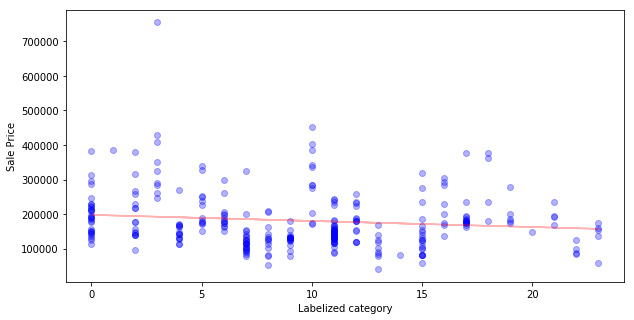

In [127]:
# Ploting real data y (blue)
plt.scatter(X_dev[[categorical_column + "_label"]], y_dev, alpha=0.3, c="blue")
# versus predicted y_hat (red)


plt.plot(X_dev[[categorical_column + "_label"]], y_dev_hat, alpha=0.3, c="red")

plt.xlabel("Labelized category")
plt.ylabel("Sale Price")

__Nota__ : Vemos que la predicción es casi constante y probablemente deberíamos reordenar las etiquetas de una manera diferente. Hay dos maneras de resolverlo que discutiremos aquí.

1. Podríamos etiquetar las categorías de manera que no tengan un pedido. Podemos hacer esto usando One-Hot-Encoding.

2. Categorías etiquetadas por números que tiene sentido.

### 2.1 One-hot-encoding

Esto es creando tantas columnas como categorías que tenemos y rellenándolas con ceros, excepto la que corresponde a la categoría. Así codifica las categorías de la siguiente manera:

* dog to `[1, 0, 1]`
* cat to `[0, 1, 0]`
* horse to `[0, 0, 1]`

en el caso de una variable con tres valores distintos

## Ejercicio:

Entiende que hace el siguiente código

In [128]:
def label_one_hot_encoding(series, dict_length=None):
    if dict_length is None:
        dict_length = len(series.unique())
    return np.eye(dict_length)[series]

In [172]:
a = X_train['Neighborhood_label'][0:3]

In [171]:
label_one_hot_encoding(a)

AttributeError: 'list' object has no attribute 'unique'

Vamos a ver la diferencia con la labelización para el mismo ejemplo:

In [146]:
dict_length = len(X_train[categorical_column + "_label"].unique())

In [147]:
label_one_hot_encoding(X_train[categorical_column + "_label"], dict_length).shape

(876, 25)

In [148]:
reg.fit(label_one_hot_encoding(X_train[categorical_column + "_label"], dict_length), y_train)
y_dev_hat = reg.predict(label_one_hot_encoding(X_dev[categorical_column + "_label"], dict_length))
print(np.sqrt(mean_squared_error(y_dev, y_dev_hat)))

58895.46878723191


### 2.1 Value encoding

Otra forma de codificar categorías es usar valores promedio de la variable objetivo. En realidad, en esta situación obtendremos exactamente las mismas predicciones `y_dev_hat`. Lo más importante que debes recordar es utilizar `X_train` y ` y_train`. Veamos con el siguiente código lo que significa.

In [197]:
category_value_df = X_train[[categorical_column]]
category_value_df[categorical_column+"_value"] = y_train
category_value_df = category_value_df.groupby(categorical_column, as_index=False).mean()
category_value_df.head()

,Neighborhood,Neighborhood_value
0,Blmngtn,191537.400000
1,Blueste,124000.000000
2,BrDale,109250.000000
3,BrkSide,123232.142857
4,ClearCr,215843.058824


In [194]:
y_dev_hat_value_encoded = \
    X_dev.merge(category_value_df, how="left", on=categorical_column)[[categorical_column+"_value"]]
print(np.sqrt(mean_squared_error(y_dev, y_dev_hat)))

58945.13357256039


    Poniéndolo todo junto:

In [199]:
columns = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 
'TotalBsmtSF', "Neighborhood", "ExterQual"]

target_col = "SalePrice"

X = houses[columns]
y = houses[target_col]

X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, random_state=667, test_size=0.25)

In [200]:
class Labelizer:
    
    def __init__(self, categories):
        self.categories = categories
        self.cat2num = {}
        self.num2cat = {}
        
    def generate_dicts(self):
        self.cat2num = {self.categories[i]: i for i in range(len(self.categories))}
        self.num2cat = {i: self.categories[i] for i in range(len(self.categories))}
        
    def fit(self):
        self.generate_dicts()
        return self
        
    def transform(self, series):
        return series.apply(lambda cat: self.cat2num[cat])
    
labelizer_Neighborhood = Labelizer(X_train["Neighborhood"].unique()).fit()  
labelizer_ExterQual = Labelizer(X_train["ExterQual"].unique()).fit()

def labelize_X(X):
    labelized_X = X.drop(["Neighborhood", "ExterQual"], axis=1)
    labelized_X["Neighborhood_labelized"] = labelizer_Neighborhood.transform(X["Neighborhood"])
    labelized_X["ExterQual_labelized"] = labelizer_ExterQual.transform(X["ExterQual"])
    return labelized_X

X_train_labelized = labelize_X(X_train)
X_dev_labelized = labelize_X(X_dev)

reg.fit(X_train_labelized, y_train)
y_dev_hat = reg.predict(X_dev_labelized)
print(np.sqrt(mean_squared_error(y_dev, y_dev_hat)))

42536.3880936548


In [201]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[7], [8], [9]])
C = np.array([[11, 12], [13, 14], [16, 15]])
np.concatenate([A, B, C], axis=1)

array([[ 1,  2,  7, 11, 12],
       [ 3,  4,  8, 13, 14],
       [ 5,  6,  9, 16, 15]])

In [202]:
class OneHotEncoderWithLabelizer:
    
    def __init__(self, categories):
        self.categories = categories
        self.labelizer = Labelizer(categories)
            
    def fit(self):
        self.labelizer.fit()
        return self
        
    def transform(self, series):
        series_labelized = self.labelizer.transform(series)
        return np.eye(len(self.categories))[series_labelized]
    
one_hot_encoder_Neighborhood = OneHotEncoderWithLabelizer(X_train["Neighborhood"].unique()).fit()  
one_hot_encoder_ExterQual = OneHotEncoderWithLabelizer(X_train["ExterQual"].unique()).fit()

def one_hot_encode_X(X):
    X_other = X.drop(["Neighborhood", "ExterQual"], axis=1).as_matrix()
    neighborhood_encoded = one_hot_encoder_Neighborhood.transform(X["Neighborhood"])
    exterQual_encoded = one_hot_encoder_ExterQual.transform(X["ExterQual"])
    return np.concatenate([X_other, neighborhood_encoded, exterQual_encoded], axis=1)

X_train_encoded = one_hot_encode_X(X_train)
X_dev_encoded = one_hot_encode_X(X_dev)

reg.fit(X_train_encoded, y_train)
y_dev_hat = reg.predict(X_dev_encoded)
print(np.sqrt(mean_squared_error(y_dev, y_dev_hat)))

38502.67090075815


In [203]:
import string

class ValueEncoder:
    
    def __init__(self, cat_colname=None, value_colname=None, agg_function='mean',):
        self.agg_function = agg_function
        self.cat_colname = cat_colname if cat_colname is not None else\
            ''.join(np.random.choice(list(string.ascii_lowercase + string.digits)) for _ in range(10))
        self.value_colname = value_colname if value_colname is not None else\
            self.cat_colname + "_" + self.agg_function
        self.cat_value_df = None
            
    def fit(self, cat_series, value_series):
        cat_value_df = pd.DataFrame({
            self.cat_colname: cat_series,
            self.value_colname: value_series
        })
        self.cat_value_df = cat_value_df\
            .groupby(self.cat_colname, as_index=False)\
            .agg(self.agg_function)
        return self
        
    def transform(self, cat_series):
        return pd.DataFrame({self.cat_colname:cat_series})\
            .merge(self.cat_value_df, on=self.cat_colname, how="left")[self.value_colname]

value_encoder_Neighborhood = ValueEncoder("Neighborhood")\
   .fit(X_train["Neighborhood"], y_train)  
value_encoder_ExterQual = ValueEncoder("ExterQual")\
   .fit(X_train["ExterQual"], y_train)

def value_encode_X(X):
    encoded_X = X.drop(["Neighborhood", "ExterQual"], axis=1).reset_index(drop=True)
    encoded_X["Neighborhood_encoded"] = value_encoder_Neighborhood.transform(X["Neighborhood"])
    encoded_X["ExterQual_encoded"] = value_encoder_ExterQual.transform(X["ExterQual"])
    return encoded_X

X_train_encoded = value_encode_X(X_train)
X_dev_encoded = value_encode_X(X_dev)
reg.fit(X_train_encoded, y_train)
y_dev_hat = reg.predict(X_dev_encoded)
print(np.sqrt(mean_squared_error(y_dev, y_dev_hat)))

40200.74117925314
